In [1]:
import tensorflow as tf  # Import TensorFlow library for deep learning operations

from tensorflow.keras import models, layers  # Import specific modules from TensorFlow Keras API

import matplotlib.pyplot as plt  # Import matplotlib for plotting

from IPython.display import HTML  # Import HTML class from IPython.display for displaying HTML content


In [2]:
BATCH_SIZE = 32  # Defines the number of samples per gradient update during training.

IMAGE_SIZE = 256  # Specifies the size of the input images in pixels.

CHANNELS = 3  # Represents the number of color channels in the images (e.g., RGB).

EPOCHS = 50 
'''Indicates the number of times the entire dataset will be passed forward and 
backward through the neural network during training.'''


'Indicates the number of times the entire dataset will be passed forward and \nbackward through the neural network during training.'

In [3]:
dataset = tf.keras.preprocessing.image_dataset_from_directory( 
    # Creates a dataset of images and labels from a directory on disk.
   
    "PlantVillage",  # Specifies the directory path from which to load the images.
    seed=123,  # Sets the random seed for shuffling the dataset to ensure reproducibility.
    shuffle=True,  # Indicates whether to shuffle the dataset or not.
    image_size=(IMAGE_SIZE, IMAGE_SIZE),  # Sets the desired size for the images to be resized during loading.
    batch_size=BATCH_SIZE  # Specifies the number of samples to include in each batch of the dataset.
)

'''

The tf.keras.preprocessing.image_dataset_from_directory() function creates a TensorFlow dataset from image files 
stored in a directory on disk. It loads the images along with their corresponding labels, shuffles them if specified, 
resizes them to a specified size, and forms batches of specified sizes for training deep learning models.
'''


# sari image ko load kar raha and 32 batch mai distribute kar raha


Found 2152 files belonging to 3 classes.


'\n\nThe tf.keras.preprocessing.image_dataset_from_directory() function creates a TensorFlow dataset from image files \nstored in a directory on disk. It loads the images along with their corresponding labels, shuffles them if specified, \nresizes them to a specified size, and forms batches of specified sizes for training deep learning models.\n'

In [4]:
dataset

<BatchDataset shapes: ((None, 256, 256, 3), (None,)), types: (tf.float32, tf.int32)>

In [5]:
class_names = dataset.class_names 
# Retrieves the class names from the dataset, which represent the categories or labels of the images.


class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

(32, 256, 256, 3)
[1 1 1 0 0 0 0 0 1 1 1 1 0 1 0 1 1 1 0 1 0 1 0 0 1 0 0 1 1 2 0 0]


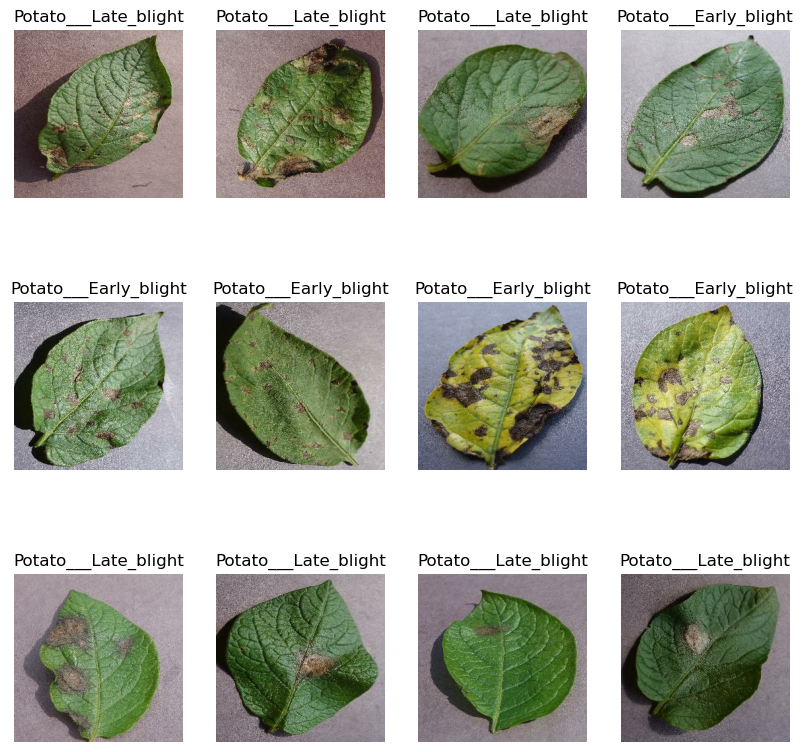

In [6]:
plt.figure(figsize=(10,10))  # Creates a new figure with a specified size for plotting.

for image_batch, labels_batch in dataset.take(1):  # Iterates over the first batch of images and labels in the dataset.
    
    print(image_batch.shape)  # Prints the shape of the image batch.
    
    print(labels_batch.numpy())  # Prints the numerical labels of the images as a NumPy array.
    
    for i in range(12):  # Iterates over the first 12 images in the batch to plot them in a 3x4 grid.
        
        ax = plt.subplot(3, 4, i+1)  # Creates subplots within the figure in a 3x4 grid.
        
        plt.imshow(image_batch[i].numpy().astype("uint8"))  # Plots the ith image from the batch as a uint8 array.
        
        plt.title(class_names[labels_batch[i]])  # Sets the title of the subplot to the corresponding class name.
        
        plt.axis("off")  # Turns off the axis for the subplot.


In [7]:
#80% training ke liye

# 20% test ke liye
   #10% validation k liye    during training har epoch mai epoch ki training ko measure karega
   #10% last mai test test karega

len(dataset)


68

In [8]:
#68 (as 68 batch hai 32image size k batch ke)


train_size = 0.8
len(dataset)*train_size

54.400000000000006

In [9]:
#68  maai se 54 lene(80%) 

train_ds = dataset.take(54)
len(train_ds)

# sure ke 54 training ke

54

In [10]:
test_ds = dataset.skip(54)   #54 chod kar baki ka size
len(test_ds)



14

In [11]:
# 14 mai se validation and test k liye lenge

val_size=0.1
len(dataset)*val_size


6.800000000000001

In [12]:
val_ds = test_ds.take(6)  # Extracts the first 6 batches from the test dataset for validation.
len(val_ds)  # Computes the number of batches in the validation dataset.


6

In [13]:
test_ds = test_ds.skip(6)  # Skips the first 6 batches in the test dataset.
len(test_ds)  # Computes the number of batches remaining in the test dataset.


8

In [14]:
# step 14-20 fx ke through


def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    assert (train_split + test_split + val_split) == 1  # Ensures that the sum of splits equals 1.
    
    ds_size = len(ds)  # Computes the total number of batches in the dataset.
    
    if shuffle:  # If shuffle is set to True, shuffles the dataset.
        ds = ds.shuffle(shuffle_size, seed=12)
    
    train_size = int(train_split * ds_size)  # Calculates the size of the training dataset.
    val_size = int(val_split * ds_size)  # Calculates the size of the validation dataset.
    
    train_ds = ds.take(train_size)  # Extracts the training dataset.
    val_ds = ds.skip(train_size).take(val_size)  # Extracts the validation dataset.
    test_ds = ds.skip(train_size).skip(val_size)  # Extracts the test dataset.
    
    return train_ds, val_ds, test_ds  # Returns the training, validation, and test datasets.


In [15]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)  
# Splits the dataset into training, validation, and test datasets according to default split ratios.


In [16]:
train_ds


<TakeDataset shapes: ((None, 256, 256, 3), (None,)), types: (tf.float32, tf.int32)>

In [17]:

'''
train_ds contains the training dataset, which is a portion of the original dataset used for training machine learning models.

'''

'\ntrain_ds contains the training dataset, which is a portion of the original dataset used for training machine learning models.\n\n'

In [18]:
val_ds




<TakeDataset shapes: ((None, 256, 256, 3), (None,)), types: (tf.float32, tf.int32)>

In [19]:

'''
val_ds contains the validation dataset, which is used to evaluate the performance of the model during training to
tune hyperparameters and prevent overfitting.

'''

'\nval_ds contains the validation dataset, which is used to evaluate the performance of the model during training to tune hyperparameters and prevent overfitting.\n'

In [20]:
test_ds



<SkipDataset shapes: ((None, 256, 256, 3), (None,)), types: (tf.float32, tf.int32)>

In [21]:
'''

test_ds contains the test dataset, which is used to evaluate the final performance of the trained model after
training and validation. It provides an unbiased assessment of the model's generalization capability on unseen data.

'''

"\n\ntest_ds contains the test dataset, which is used to evaluate the final performance of the trained model after\ntraining and validation. It provides an unbiased assessment of the model's generalization capability on unseen data.\n\n"

In [22]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE) 
# Caches, shuffles, and prefetches batches of the training dataset for improved performance during training.


val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE) 
# Caches, shuffles, and prefetches batches of the validation dataset for improved performance during validation.


test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE) 
# Caches, shuffles, and prefetches batches of the test dataset for improved performance during testing.


In [23]:
train_ds 

<PrefetchDataset shapes: ((None, 256, 256, 3), (None,)), types: (tf.float32, tf.int32)>

In [24]:


'''

train_ds now contains the training dataset with caching, shuffling, 
and prefetching applied to enhance performance during model training.

'''

'\n\ntrain_ds now contains the training dataset with caching, shuffling, \nand prefetching applied to enhance performance during model training.\n\n'

In [25]:
val_ds



<PrefetchDataset shapes: ((None, 256, 256, 3), (None,)), types: (tf.float32, tf.int32)>

In [26]:
'''

val_ds now contains the validation dataset with caching, shuffling,
and prefetching applied to enhance performance during model validation

'''

'\n\nval_ds now contains the validation dataset with caching, shuffling,\nand prefetching applied to enhance performance during model validation\n\n'

In [27]:
test_ds 


<PrefetchDataset shapes: ((None, 256, 256, 3), (None,)), types: (tf.float32, tf.int32)>

In [28]:

'''
test_ds now contains the test dataset with caching, shuffling,
and prefetching applied to enhance performance during model testing.
'''

'\ntest_ds now contains the test dataset with caching, shuffling,\nand prefetching applied to enhance performance during model testing.\n'

In [29]:
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),  
    # Resizes input images to the specified dimensions.
    
    
    layers.experimental.preprocessing.Rescaling(1./255), 
    # Rescales pixel values from the range [0, 255] to [0, 1].
])


In [30]:
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),  
    # Randomly flips images horizontally and vertically.
    
    
    layers.experimental.preprocessing.RandomRotation(0.2),
    # Randomly applies rotation to images within the specified range.
])


In [31]:
train_ds = train_ds.map(
    lambda x, y: (data_augmentation(x, training=True), y)
    # Applies data augmentation to the training dataset with training mode enabled.
    

).prefetch(buffer_size=tf.data.AUTOTUNE)  

# Prefetches batches of the augmented training dataset for improved performance during training.


In [32]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)  # Defines the input shape for the model.
n_classes = 3  # Specifies the number of classes in the classification task.


model = models.Sequential([
    resize_and_rescale,  # Resizes and rescales input images using the specified preprocessing layers.
    layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape),  
    
    # Adds a 2D convolutional layer with ReLU activation.
    
    layers.MaxPooling2D((2, 2)),  # Adds a max pooling layer.
    
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),  # Adds another 2D convolutional layer with ReLU activation.
    
    layers.MaxPooling2D((2, 2)),  # Adds another max pooling layer.
    
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),  # Adds another 2D convolutional layer with ReLU activation.
    
    layers.MaxPooling2D((2, 2)),  # Adds another max pooling layer.
    
    layers.Conv2D(64, (3, 3), activation='relu'),  # Adds another 2D convolutional layer with ReLU activation.
    
    layers.MaxPooling2D((2, 2)),  # Adds another max pooling layer.
    
    layers.Conv2D(64, (3, 3), activation='relu'),  # Adds another 2D convolutional layer with ReLU activation.
    
    layers.MaxPooling2D((2, 2)),  # Adds another max pooling layer.
    
    layers.Conv2D(64, (3, 3), activation='relu'),  # Adds another 2D convolutional layer with ReLU activation.
    
    layers.MaxPooling2D((2, 2)),  # Adds another max pooling layer.
    
    layers.Flatten(),  # Flattens the input into a 1D array.
    
    layers.Dense(64, activation='relu'),  # Adds a dense layer with ReLU activation.
    
    layers.Dense(n_classes, activation='softmax'),  # Adds the output layer with softmax activation for classification.
])

model.build(input_shape=input_shape)  # Builds the model with the specified input shape.


In [33]:
model.summary()

'''
The model.summary() function provides a concise summary of the architecture and parameters of the neural network model.
Here's what each part of the summary represents:


Model: Specifies the type of model, which is "sequential" in this case.
Layer (type): Lists the layers in the model along with their types.
Output Shape: Shows the shape of the output of each layer.
Param #: Indicates the number of parameters (weights and biases) in each layer.
Total params: Displays the total number of trainable parameters in the model.
Trainable params: Represents the number of parameters that are trainable and will be updated during training.

Non-trainable params: Shows the number of parameters that are not trainable,typically from preprocessing layers or frozen layers.



'''

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential (Sequential)      (32, 256, 256, 3)         0         
_________________________________________________________________
conv2d (Conv2D)              (32, 254, 254, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (32, 127, 127, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (32, 125, 125, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (32, 62, 62, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (32, 60, 60, 64)          36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (32, 30, 30, 64)         

'\nThe model.summary() function provides a concise summary of the architecture and parameters of the neural network model.\nHere\'s what each part of the summary represents:\n\n\nModel: Specifies the type of model, which is "sequential" in this case.\nLayer (type): Lists the layers in the model along with their types.\nOutput Shape: Shows the shape of the output of each layer.\nParam #: Indicates the number of parameters (weights and biases) in each layer.\nTotal params: Displays the total number of trainable parameters in the model.\nTrainable params: Represents the number of parameters that are trainable and will be updated during training.\n\nNon-trainable params: Shows the number of parameters that are not trainable,typically from preprocessing layers or frozen layers.\n\n\n\n'

In [34]:
model.compile(
    optimizer='adam',  # Specifies the optimizer to be used for training the model, in this case, Adam optimizer.
    
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),  
    # Specifies the loss function to be used for training the model, in this case, sparse categorical cross-entropy.
    
    metrics=['accuracy']  # Specifies the evaluation metric to be used during training, in this case, accuracy.
)


In [35]:
history = model.fit(
    train_ds,  # Specifies the training dataset.
    batch_size=BATCH_SIZE,  # Specifies the batch size for training.
    validation_data=val_ds,  # Specifies the validation dataset for evaluating model performance.
    verbose=1,  # Sets the verbosity mode during training to display progress bars.
    epochs=50,  # Specifies the number of epochs for training the model.
)


Epoch 1/50
54/54 [==============================] - 189s 3s/step - loss: 0.9052 - accuracy: 0.4925 - val_loss: 0.9174 - val_accuracy: 0.5625
Epoch 2/50
54/54 [==============================] - 177s 3s/step - loss: 0.7152 - accuracy: 0.6962 - val_loss: 0.6018 - val_accuracy: 0.7448
Epoch 3/50
54/54 [==============================] - 174s 3s/step - loss: 0.4969 - accuracy: 0.7951 - val_loss: 0.4077 - val_accuracy: 0.7917
Epoch 4/50
54/54 [==============================] - 173s 3s/step - loss: 0.3064 - accuracy: 0.8750 - val_loss: 0.2542 - val_accuracy: 0.8854
Epoch 5/50
54/54 [==============================] - 167s 3s/step - loss: 0.2850 - accuracy: 0.8848 - val_loss: 0.2103 - val_accuracy: 0.8958
Epoch 6/50
54/54 [==============================] - 173s 3s/step - loss: 0.2194 - accuracy: 0.9103 - val_loss: 0.3516 - val_accuracy: 0.8385
Epoch 7/50
54/54 [==============================] - 161s 3s/step - loss: 0.2224 - accuracy: 0.9161 - val_loss: 0.2519 - val_accuracy: 0.8958
Epoch 8/50
54

In [36]:
scores = model.evaluate(test_ds)  # Evaluates the model performance on the test dataset and returns the evaluation scores.


8/8 [==============================] - 11s 786ms/step - loss: 0.0330 - accuracy: 0.9883


In [37]:
scores

[0.03301480785012245, 0.98828125]

In [38]:
history.params

{'verbose': 1, 'epochs': 50, 'steps': 54}

In [39]:


'''
history.params contains a dictionary with the parameters used during the training of the model. These parameters include:

'verbose': Specifies the verbosity mode during training.
'epochs': Specifies the number of epochs for training the model.
'steps': Indicates the total number of steps (batches) per epoch.
'samples': Indicates the total number of samples seen during training.
'batch_size': Specifies the batch size used during training.
'do_validation': Indicates whether validation data was provided during training.
'metrics': Lists the names of the metrics being monitored during training.

'''

"\nhistory.params contains a dictionary with the parameters used during the training of the model. These parameters include:\n\n'verbose': Specifies the verbosity mode during training.\n'epochs': Specifies the number of epochs for training the model.\n'steps': Indicates the total number of steps (batches) per epoch.\n'samples': Indicates the total number of samples seen during training.\n'batch_size': Specifies the batch size used during training.\n'do_validation': Indicates whether validation data was provided during training.\n'metrics': Lists the names of the metrics being monitored during training.\n\n"

In [40]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [41]:



'''
history.history.keys() returns a list of keys representing the metrics tracked during the training process. These keys typically include:

'loss': Training loss values for each epoch.
'accuracy': Training accuracy values for each epoch.
'val_loss': Validation loss values for each epoch (if validation data is provided).
'val_accuracy': Validation accuracy values for each epoch (if validation data is provided).

'''

"\nhistory.history.keys() returns a list of keys representing the metrics tracked during the training process. These keys typically include:\n\n'loss': Training loss values for each epoch.\n'accuracy': Training accuracy values for each epoch.\n'val_loss': Validation loss values for each epoch (if validation data is provided).\n'val_accuracy': Validation accuracy values for each epoch (if validation data is provided).\n\n"

In [42]:
type(history.history['loss'])


list

In [43]:


'''

The type of history.history['loss'] is typically a list or numpy array containing the training loss values for each epoch 
during the training process. 

It could be either a list or a numpy.ndarray depending on the implementation.


'''

"\n\nThe type of history.history['loss'] is typically a list or numpy array containing the training loss values for each epoch during the training process. \n\nIt could be either a list or a numpy.ndarray depending on the implementation.\n\n\n"

In [44]:
len(history.history['loss'])

50

In [45]:


''' returns the number of elements in the list or numpy array containing the training loss valuesfor each epoch during 
the training process. This indicates the total number of epochs for which training loss values are recorded.  '''

' returns the number of elements in the list or numpy array containing the training loss valuesfor each epoch during \nthe training process. This indicates the total number of epochs for which training loss values are recorded.  '

In [46]:
history.history['loss'][:5] # show loss for first 5 epochs

[0.9051735997200012,
 0.7152495384216309,
 0.49691513180732727,
 0.30635568499565125,
 0.28498226404190063]

In [47]:
acc = history.history['accuracy']  # Retrieves the training accuracy values for each epoch.
val_acc = history.history['val_accuracy']  # Retrieves the validation accuracy values for each epoch.

loss = history.history['loss']  # Retrieves the training loss values for each epoch.
val_loss = history.history['val_loss']  # Retrieves the validation loss values for each epoch.



In [48]:
acc

[0.49247685074806213,
 0.6961805820465088,
 0.7951388955116272,
 0.875,
 0.8848379850387573,
 0.9103009104728699,
 0.9160879850387573,
 0.9346064925193787,
 0.9432870149612427,
 0.9519675970077515,
 0.9513888955116272,
 0.9594907164573669,
 0.9490740895271301,
 0.9681712985038757,
 0.9629629850387573,
 0.9600694179534912,
 0.9484953880310059,
 0.9670138955116272,
 0.9722222089767456,
 0.9560185074806213,
 0.9612268805503845,
 0.9762731194496155,
 0.9710648059844971,
 0.9745370149612427,
 0.9809027910232544,
 0.9774305820465088,
 0.9652777910232544,
 0.9623842835426331,
 0.9681712985038757,
 0.96875,
 0.9785879850387573,
 0.9809027910232544,
 0.9826388955116272,
 0.9837962985038757,
 0.9716435074806213,
 0.9768518805503845,
 0.9913194179534912,
 0.9762731194496155,
 0.9832175970077515,
 0.9878472089767456,
 0.9710648059844971,
 0.9809027910232544,
 0.9762731194496155,
 0.9866898059844971,
 0.9814814925193787,
 0.9837962985038757,
 0.9878472089767456,
 0.9872685074806213,
 0.990740716457

In [49]:
val_acc

[0.5625,
 0.7447916865348816,
 0.7916666865348816,
 0.8854166865348816,
 0.8958333134651184,
 0.8385416865348816,
 0.8958333134651184,
 0.9322916865348816,
 0.8958333134651184,
 0.90625,
 0.9114583134651184,
 0.8958333134651184,
 0.9270833134651184,
 0.9270833134651184,
 0.9635416865348816,
 0.9375,
 0.8958333134651184,
 0.9427083134651184,
 0.8958333134651184,
 0.84375,
 0.9114583134651184,
 0.9270833134651184,
 0.9322916865348816,
 0.921875,
 0.9375,
 0.8802083134651184,
 0.9375,
 0.9375,
 0.921875,
 0.984375,
 0.9166666865348816,
 0.90625,
 0.96875,
 0.984375,
 0.953125,
 0.953125,
 0.9479166865348816,
 0.90625,
 0.9479166865348816,
 0.9322916865348816,
 0.90625,
 0.9270833134651184,
 0.921875,
 0.96875,
 0.96875,
 0.9583333134651184,
 0.9479166865348816,
 0.9479166865348816,
 0.9010416865348816,
 0.9895833134651184]

In [50]:
loss

[0.9051735997200012,
 0.7152495384216309,
 0.49691513180732727,
 0.30635568499565125,
 0.28498226404190063,
 0.2194330096244812,
 0.22242358326911926,
 0.17346589267253876,
 0.14967986941337585,
 0.12262458354234695,
 0.1302957832813263,
 0.11561284959316254,
 0.12670208513736725,
 0.10154501348733902,
 0.11385113000869751,
 0.10620094835758209,
 0.13745662569999695,
 0.09632521867752075,
 0.07446814328432083,
 0.11666575819253922,
 0.10308807343244553,
 0.06696952134370804,
 0.07584160566329956,
 0.07097222656011581,
 0.06436005979776382,
 0.06177675724029541,
 0.10148821026086807,
 0.09666217863559723,
 0.08644358068704605,
 0.0774121806025505,
 0.055041078478097916,
 0.045540936291217804,
 0.04792428016662598,
 0.04258653521537781,
 0.08448408544063568,
 0.06224158778786659,
 0.02896912954747677,
 0.05582847818732262,
 0.04581011086702347,
 0.03187653794884682,
 0.0719270408153534,
 0.04861505702137947,
 0.057803329080343246,
 0.04278852045536041,
 0.054719775915145874,
 0.034336894

In [51]:
val_loss

[0.9174103736877441,
 0.6018204689025879,
 0.40766891837120056,
 0.25416505336761475,
 0.21026889979839325,
 0.3515641391277313,
 0.251865953207016,
 0.17152833938598633,
 0.26915809512138367,
 0.2567973732948303,
 0.19870002567768097,
 0.28895998001098633,
 0.158202663064003,
 0.17749272286891937,
 0.0860796645283699,
 0.16739483177661896,
 0.24690528213977814,
 0.12296145409345627,
 0.22295331954956055,
 0.40485844016075134,
 0.1964627504348755,
 0.17457890510559082,
 0.14352960884571075,
 0.21657980978488922,
 0.16710884869098663,
 0.29516416788101196,
 0.16121891140937805,
 0.14505618810653687,
 0.19042682647705078,
 0.05069170892238617,
 0.23844920098781586,
 0.2982621490955353,
 0.08689398318529129,
 0.06344125419855118,
 0.10676335543394089,
 0.12677772343158722,
 0.19561786949634552,
 0.25791093707084656,
 0.12535348534584045,
 0.22591368854045868,
 0.2837672531604767,
 0.19434495270252228,
 0.2482619732618332,
 0.08910290151834488,
 0.09399480372667313,
 0.12323548644781113,
 

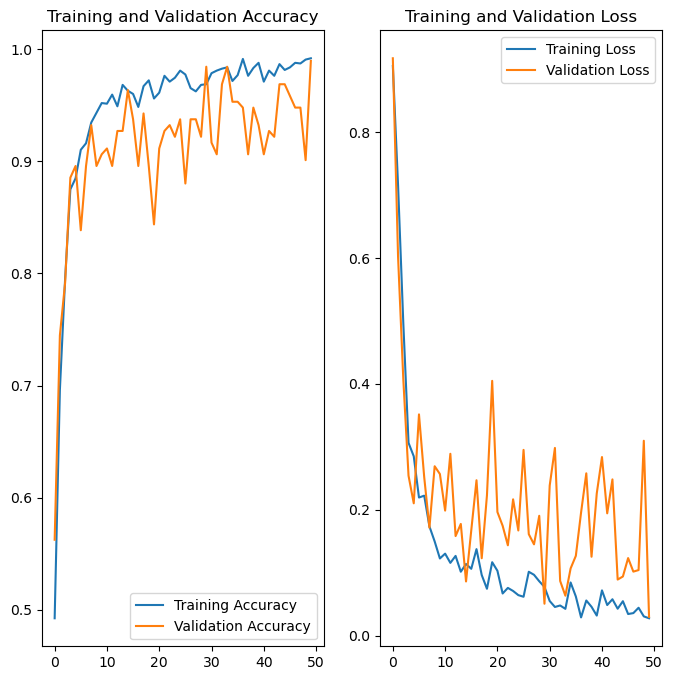

In [52]:
plt.figure(figsize=(8, 8))  # Creates a new figure with a specified size for plotting.

# Subplot 1: Training and Validation Accuracy

plt.subplot(1, 2, 1)  # Specifies the position of the subplot in a 1x2 grid.

plt.plot(range(EPOCHS), acc, label='Training Accuracy')  # Plots the training accuracy values against epochs.

plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')  # Plots the validation accuracy values against epochs.

plt.legend(loc='lower right')  # Adds a legend to the plot at the specified location.

plt.title('Training and Validation Accuracy')  # Sets the title of the subplot.




# Subplot 2: Training and Validation Loss

plt.subplot(1, 2, 2)  # Specifies the position of the subplot in a 1x2 grid.

plt.plot(range(EPOCHS), loss, label='Training Loss')  # Plots the training loss values against epochs.

plt.plot(range(EPOCHS), val_loss, label='Validation Loss')  # Plots the validation loss values against epochs.

plt.legend(loc='upper right')  # Adds a legend to the plot at the specified location.

plt.title('Training and Validation Loss')  # Sets the title of the subplot.

plt.show()  # Displays the plots.


first image to predict
actual label: Potato___Late_blight
predicted label: Potato___Late_blight


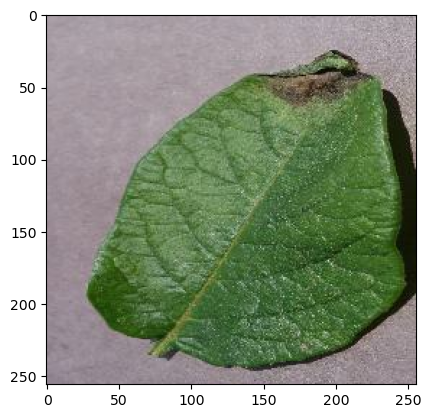

In [53]:
import numpy as np

for images_batch, labels_batch in test_ds.take(1):
    first_image = images_batch[0].numpy().astype('uint8') 
    # Retrieves the first image from the batch and converts it to uint8 format.
    
    first_label = labels_batch[0].numpy()  # Retrieves the label of the first image from the batch.
    
    print("first image to predict")
    plt.imshow(first_image)  # Displays the first image from the batch.
    print("actual label:", class_names[first_label])  # Prints the actual label of the first image.
    
    batch_prediction = model.predict(images_batch)  # Performs batch prediction using the trained model on the images batch.
    print("predicted label:", class_names[np.argmax(batch_prediction[0])])  # Prints the predicted label of the first image.


In [54]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(img.numpy())  # Converts the image to a NumPy array.
    img_array = tf.expand_dims(img_array, 0)  # Adds an extra dimension to match the model's input shape.

    predictions = model.predict(img_array)  # Performs prediction on the image array using the model.

    predicted_class = class_names[np.argmax(predictions[0])]  # Determines the predicted class label.
    confidence = round(100 * (np.max(predictions[0])), 2)  # Calculates the confidence level of the prediction.
    return predicted_class, confidence  # Returns the predicted class label and confidence level.


'''

This predict function takes a trained model and an image as input and performs prediction on that image using the model. 
Here's a breakdown of what it does:

Converts the input image to a NumPy array using tf.keras.preprocessing.image.img_to_array().
Expands the dimensions of the image array to match the input shape expected by the model using tf.expand_dims().
Uses the trained model to predict the class probabilities for the input image using model.predict().
Determines the predicted class label by selecting the class with the highest probability.
Calculates the confidence level of the prediction as a percentage.
Returns the predicted class label and confidence level.

'''

"\n\nThis predict function takes a trained model and an image as input and performs prediction on that image using the model. \nHere's a breakdown of what it does:\n\nConverts the input image to a NumPy array using tf.keras.preprocessing.image.img_to_array().\nExpands the dimensions of the image array to match the input shape expected by the model using tf.expand_dims().\nUses the trained model to predict the class probabilities for the input image using model.predict().\nDetermines the predicted class label by selecting the class with the highest probability.\nCalculates the confidence level of the prediction as a percentage.\nReturns the predicted class label and confidence level.\n\n"

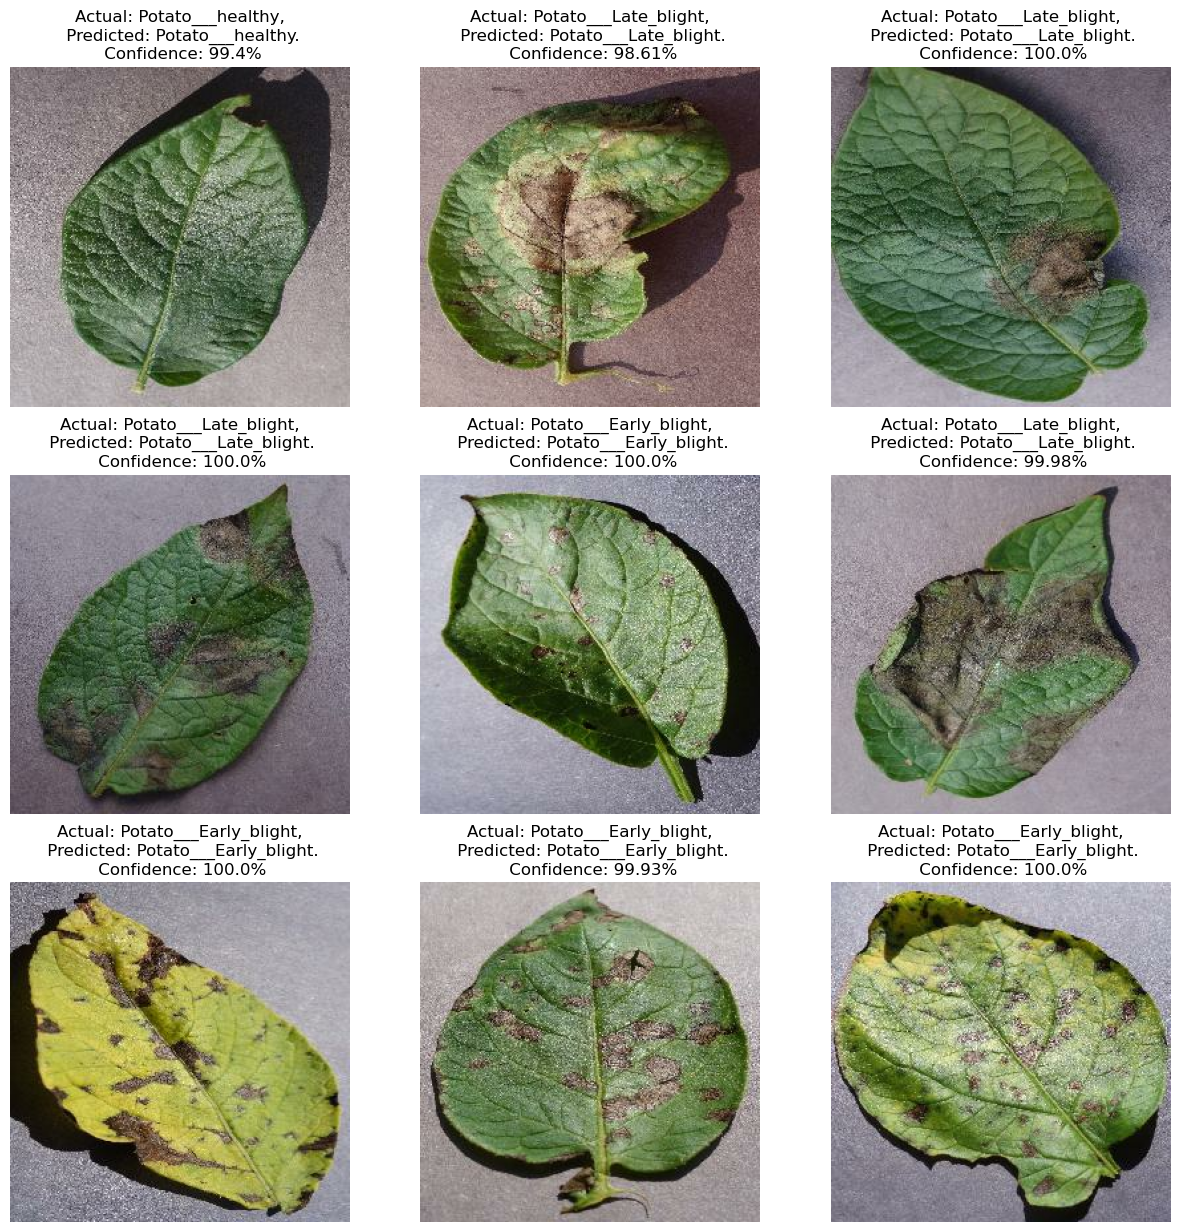

In [56]:
plt.figure(figsize=(15, 15))  # Creates a new figure with a specified size for plotting.

for images, labels in test_ds.take(1):  # Iterates over the first batch of images and labels in the test dataset.
    
    for i in range(9):  # Iterates over the first 9 images in the batch to plot them.
        
        ax = plt.subplot(3, 3, i + 1)  # Specifies the position of the subplot in a 3x3 grid.
        
        plt.imshow(images[i].numpy().astype("uint8"))  # Displays the ith image from the batch.
        
        predicted_class, confidence = predict(model, images[i])  # Predicts the class label and confidence level for the image.
        
        actual_class = class_names[labels[i]]  # Retrieves the actual class label of the image.
        
        # Sets the title of the subplot with actual and predicted class labels along with confidence level.
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")  # Turns off the axis for the subplot.

plt.show()  # Displays the plots.


In [57]:
import os  # Import the os module to interact with the operating system.

# Determine the latest version of the model by listing directories and extracting the maximum integer value.
model_version = max([int(i) for i in os.listdir("C:/Users/Dell/machine learning codes/A Working model/potato/models") + 
                     [0]]) + 1

# Save the trained model to the specified directory with the new version number.
model.save(f"C:/Users/Dell/machine learning codes/A Working model/potato/models/{model_version}")





INFO:tensorflow:Assets written to: C:/Users/Dell/machine learning codes/A Working model/potato/models/4\assets


In [58]:
'''

This code snippet performs the following tasks:

It imports the os module to interact with the operating system.

It determines the latest version of the model by listing the directories in the specified path and 
extracting the maximum integer value from the directory names. It then increments this value by 1 to create a new version of the model.

It saves the trained model to the specified directory with the new version number.

'''

'\n\nThis code snippet performs the following tasks:\n\nIt imports the os module to interact with the operating system.\n\nIt determines the latest version of the model by listing the directories in the specified path and \nextracting the maximum integer value from the directory names. It then increments this value by 1 to create a new version of the model.\n\nIt saves the trained model to the specified directory with the new version number.\n\n'

In [59]:
model.save("../potatoes.h5")

In [60]:


'''
The model.save("../potatoes.h5") command saves the trained model to a file named "potatoes.h5" 
in the parent directory of the current directory. The model is saved in the Hierarchical Data Format (HDF5) file format, 

which is commonly used for storing large numerical data.
'''

'\nThe model.save("../potatoes.h5") command saves the trained model to a file named "potatoes.h5" \nin the parent directory of the current directory. The model is saved in the Hierarchical Data Format (HDF5) file format, \n\nwhich is commonly used for storing large numerical data.\n'

In [61]:
model.save(f"..models/")
model.save(f"../models/{model_version}")

INFO:tensorflow:Assets written to: ..models/assets
INFO:tensorflow:Assets written to: ../models/4\assets


In [62]:



'''


There seems to be a discrepancy in the provided code snippets. Let me clarify.

The first line model.save(f"..models/") attempts to save the model to a directory named "..models/" which 
is not a valid directory path due to the ".." prefix. 


If you meant to save the model to a directory named "models/" in the parent directory, 
you should remove the extra dot. Here's the corrected version:

python
Copy code
model.save("../models/")
The second line model.save(f"../models/{model_version}") correctly saves the model to a directory named "models/"
in the parent directory with the version number appended to the directory name. This line is fine as it is.

'''

'\n\n\nThere seems to be a discrepancy in the provided code snippets. Let me clarify.\n\nThe first line model.save(f"..models/") attempts to save the model to a directory named "..models/" which is not a valid directory path due to the ".." prefix. \nIf you meant to save the model to a directory named "models/" in the parent directory, you should remove the extra dot. Here\'s the corrected version:\n\npython\nCopy code\nmodel.save("../models/")\nThe second line model.save(f"../models/{model_version}") correctly saves the model to a directory named "models/"\nin the parent directory with the version number appended to the directory name. This line is fine as it is.\n\n'

In [63]:
model.save("../potatoes.h5")

In [64]:


'''

The command model.save("../potatoes.h5") saves the trained model to a file named "potatoes.h5" in the parent 
directory of the current directory. The model is saved in the HDF5 file format,
which is commonly used for storing large numerical data.

'''

'\n\nThe command model.save("../potatoes.h5") saves the trained model to a file named "potatoes.h5" in the parent directory of the current directory. The model is saved in the HDF5 file format,\nwhich is commonly used for storing large numerical data.\n\n'

In [65]:
import os  # Import the os module to interact with the operating system.

# Determine the latest version of the model by listing directories and extracting the maximum integer value.
model_version = max([int(i) for i in os.listdir("../models") + [0]]) + 1

# Save the trained model to the specified directory with the new version number.
model.save(f"../models/{model_version}")




INFO:tensorflow:Assets written to: ../models/5\assets


In [66]:
'''
This code snippet performs the following tasks:

It imports the os module to interact with the operating system.

It determines the latest version of the model by listing the directories in the "../models" directory and extracting
the maximum integer value from the directory names. It then increments this value by 1 to create a new version of the model.

It saves the trained model to the "../models" directory with the new version number.

'''

'\nThis code snippet performs the following tasks:\n\nIt imports the os module to interact with the operating system.\n\nIt determines the latest version of the model by listing the directories in the "../models" directory and extracting\nthe maximum integer value from the directory names. It then increments this value by 1 to create a new version of the model.\n\nIt saves the trained model to the "../models" directory with the new version number.\n\n'

In [67]:
model.save("../potatoes.h5")


In [68]:

'''
The model.save("../potatoes.h5") command saves the trained model to a file named "potatoes.h5"
in the parent directory of the current directory. The model is saved in the Hierarchical Data Format (HDF5) file format,
which is commonly used for storing large numerical data.

'''

'\nThe model.save("../potatoes.h5") command saves the trained model to a file named "potatoes.h5"\nin the parent directory of the current directory. The model is saved in the Hierarchical Data Format (HDF5) file format,\nwhich is commonly used for storing large numerical data.\n\n'